In [1]:
import sys
import os
import numpy as np
import pandas as pd

from tqdm import tqdm
import time
import numba
import datetime

In [14]:
%matplotlib inline
from IPython.display import HTML

import holoviews as hv
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
%load_ext blackcellmagic

In [3]:
vor_path = "/home/ubuntu/git/active_vertex"
# vor_path = 'C:\\Users\\Pranav\\git\\active_vertex'
sys.path.append(vor_path)

import voronoi_model.voronoi_model_periodic as avm

In [156]:
def cell_traces_from_file(i, skip, dat_files, metadata, start=0, print_params=True):
    # Load data
    zf = dat_files[i]
    z = np.load(zf)
    x = z["arr_0"].astype(np.float32)[start:]

    # Get metadata
    prefix = os.path.split(zf)[-1].split(".npz")[0]
    t0, tmax, n_t, p0, v0, dens, rep, L_norm = metadata.loc[
        metadata["coords_fname"] == prefix,
        ["t0", "tmax", "n_t", "p0", "v0", "dens", "rep", "L_norm"],
    ].values[0]

    if print_params:
        print(prefix)
        print(
            """    p0   : {0:.2f}
        v0   : {1:.3f}
        dens : {2:.2f}
        rep  : {3}""".format(
                p0, v0, dens, int(rep)
            )
        )

    # Remove cells crossing periodic boundary
    L = L_norm / np.sqrt(dens)
    crossed = np.any(np.abs(np.diff(x, axis=0)) > L / 2, axis=(0, 2))
    x = x[:, ~crossed]

    data = {
        f"cell_{c}": hv.Curve(x[::skip, c]).opts(linewidth=1) for c in range(x.shape[1])
    }

    return hv.NdOverlay(data).opts(
        show_legend=False, xlim=(0, L_norm), ylim=(0, L_norm)
    )

In [23]:
def anim_from_file(i, dat_files, metadata):
    zf = dat_files[i]
    z = np.load(zf)
    x = z["arr_0"].astype(np.float32)
    
    prefix = os.path.split(zf)[-1].split(".npz")[0]

    t0, tmax, n_t, p0, v0, dens, rep, L_norm = metadata.loc[
        metadata["coords_fname"] == prefix, 
        ["t0", "tmax", "n_t", "p0", "v0", "dens", "rep", "L_norm"]
    ].values[0]
    
    print(
        """    p0: {0:.2f}
    v0   : {1:.3f}
    dens : {2:.2f}
    rep  : {3}""".format(p0, v0, dens, int(rep))
    )
    
    vor = avm.Tissue()
    vor.t_span = np.linspace(t0, tmax, n_t)
    vor.L = L_norm / np.sqrt(dens)
    vor.x_save = x
    vor.c_types = np.ones(x.shape[1], dtype=int)

    anim = vor.animate(n_frames=75, inline=True, interval=50)
    return HTML(anim.to_html5_video())

In [208]:
@numba.njit
def get_D_eff(X0, Xmax, L, tmax, v0, Dr):
    """"""
    dX = Xmax - X0
    dr2 = np.zeros(n, dtype=np.float32)
    for i in range(n):
        dr2[i] = dX[i, 0] ** 2 + dX[i, 1] ** 2
    
    Ds = dr2.mean() / (4*tmax)
    D0 = v0**2/(2*Dr)
    return Ds / D0

def D_eff_from_file(i, dat_files, metadata):
    """"""
    # Load data
    zf = dat_files[i]
    z = np.load(zf)
    x = z["arr_0"].astype(np.float32)
    
    # Get metadata
    prefix = os.path.split(zf)[-1].split(".npz")[0]
    tmax, v0, dens, L_norm = metadata.loc[
        metadata["coords_fname"] == prefix, 
        ["tmax", "v0", "dens", "L_norm"]
    ].values[0]
    
    # Remove cells crossing periodic boundary
    L = L_norm / np.sqrt(dens)
    crossed = np.any(np.abs(np.diff(x, axis=0)) > L / 2, axis=(0, 2))
    x = x[:, ~crossed]
    
    return get_D_eff(
        x[0],
        x[-1],
        L,
        tmax,
        v0,
        0.01,
    )

In [209]:
D_eff_from_file(0, npz_files, metadata)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: too many values to unpack (expected 5)

In [29]:
f = 200
t0 = 0
tmax = 1
dt = 0.025
n_t = int((tmax - t0) * f / dt) + 1  # calculates the n_t to get the desired dt

# a = 0.4
k = 2
J = 0.

n_c_norm = 235

<hr>

Let's get out the npz files and see what hte result is

In [5]:
from glob import glob

In [6]:
to_dir = "/home/ubuntu/git/evomorph/data/2020-10-01_p0v0dens_phase_sims2/"

In [143]:
metadata_file  = glob(os.path.join(to_dir, "*time.csv"))[0]
metadata = pd.read_csv(metadata_file, index_col=0)
metadata.head(10)

p0     v0  dens  rep    f  t0  tmax     dt    n_t  k    J  L_norm  n_c  \
0  3.2  0.002   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
1  3.2  0.016   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
2  3.2  0.030   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
3  3.4  0.002   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
4  3.4  0.016   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
5  3.4  0.030   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
6  3.6  0.002   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
7  3.6  0.016   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
8  3.6  0.030   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   
9  3.8  0.002   1.0  0.0  200   0     2  0.025  16001  2  0.0      10  235   

                      coords_fname  mins_elapsed  it_per_sec  
0  p03.20_v02.00e-03_dens1.00_rep0      6.966667   38.279904  
1  p03.20_v01.60e-02_dens1.00_rep0      6.833333   39.026829  
2  p03.20_v03.00e-02_dens1.00_rep0      6.716667   39.704715  
3  p03.40_v02.00e-03_dens1.00_rep0      6.816667   39.122249  
4  p03.40_v01.60e-02_dens1.00_rep0      7.383333   36.119639  
5  p03.40_v03.00e-02_dens1.00_rep0      6.616667   40.304786  
6  p03.60_v02.00e-03_dens1.00_rep0      7.166667   37.211628  
7  p03.60_v01.60e-02_dens1.00_rep0      6.966667   38.279904  
8  p03.60_v03.00e-02_dens1.00_rep0      6.766667   39.411330  
9  p03.80_v02.00e-03_dens1.00_rep0      7.250000   36.783908

In [199]:
npz_files = np.array(glob(os.path.join(to_dir, "*.npz")))
n_runs = len(npz_files)

sort_indices = np.empty(n_runs, dtype=int)
for i, f in enumerate(metadata.coords_fname.values):
    sort_indices[i] = (np.char.find(npz_files, f) >= 0).nonzero()[0]
    
npz_files = npz_files[sort_indices]

In [200]:
plots = []
for i in range(n_runs):
    skip, start = 300, int(100 / 0.025)
    plot = cell_traces_from_file(
        i, skip, npz_files, metadata, start=start, print_params=False
    )
    prefix = os.path.split(npz_files[i])[-1].split(".npz")[0]
    p, v, d = metadata.loc[metadata["coords_fname"] == prefix, ["p0", "v0", "dens"]].values[0]
    plot.opts(title=f"p0: {p:.2f}, v0: {v:.2e}, dens: {d:.2f}")
    plots.append(plot)

:Layout
   .NdOverlay.I     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.II    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.III   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.IV    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.V     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VI    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VII   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VIII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.IX    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.X     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XI    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XII   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIV   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XV    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVI   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVIII :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIX   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XX    :NdOverlay   [Element]
      :Curve   [x]   (y)
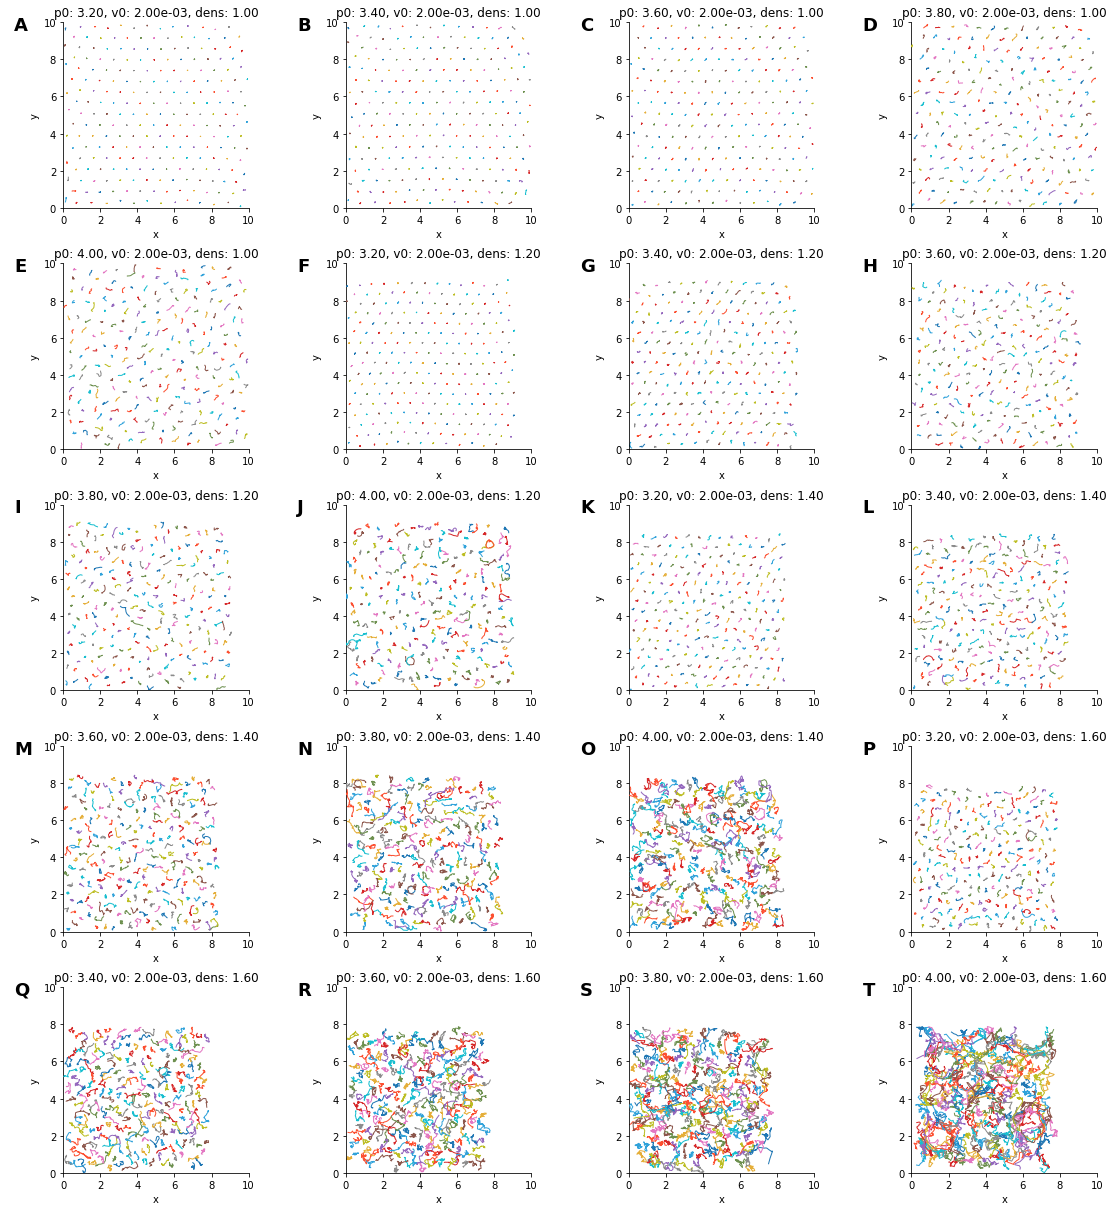

In [205]:
hv.Layout(plots[0::3]).cols(4)

:Layout
   .NdOverlay.I     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.II    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.III   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.IV    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.V     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VI    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VII   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VIII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.IX    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.X     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XI    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XII   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIV   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XV    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVI   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVIII :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIX   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XX    :NdOverlay   [Element]
      :Curve   [x]   (y)
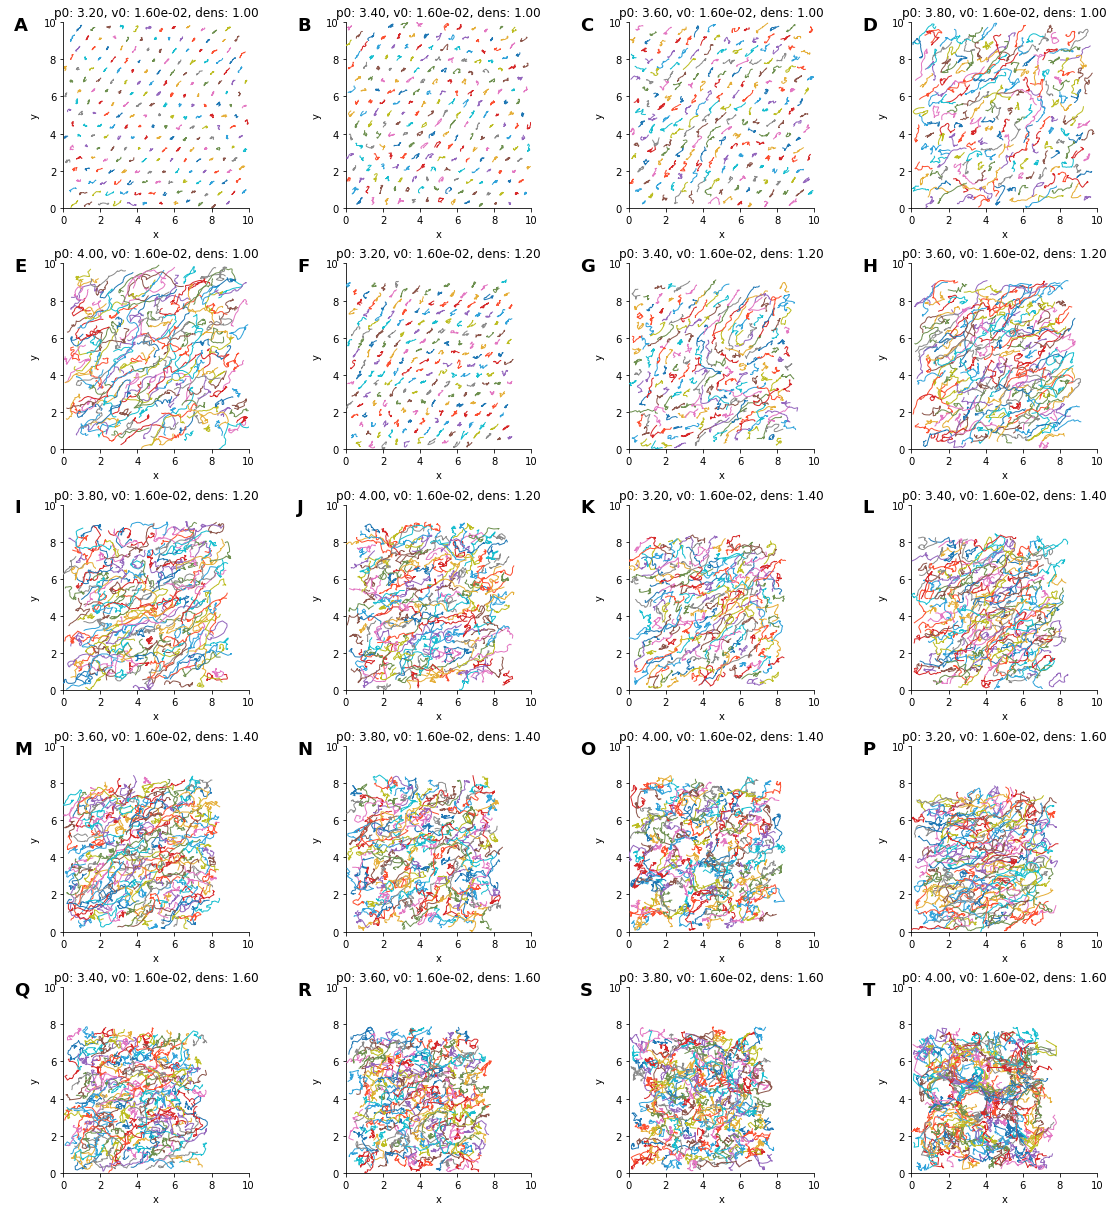

In [206]:
hv.Layout(plots[1::3]).cols(4)

:Layout
   .NdOverlay.I     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.II    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.III   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.IV    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.V     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VI    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VII   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.VIII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.IX    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.X     :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XI    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XII   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIV   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XV    :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVI   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVII  :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XVIII :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XIX   :NdOverlay   [Element]
      :Curve   [x]   (y)
   .NdOverlay.XX    :NdOverlay   [Element]
      :Curve   [x]   (y)
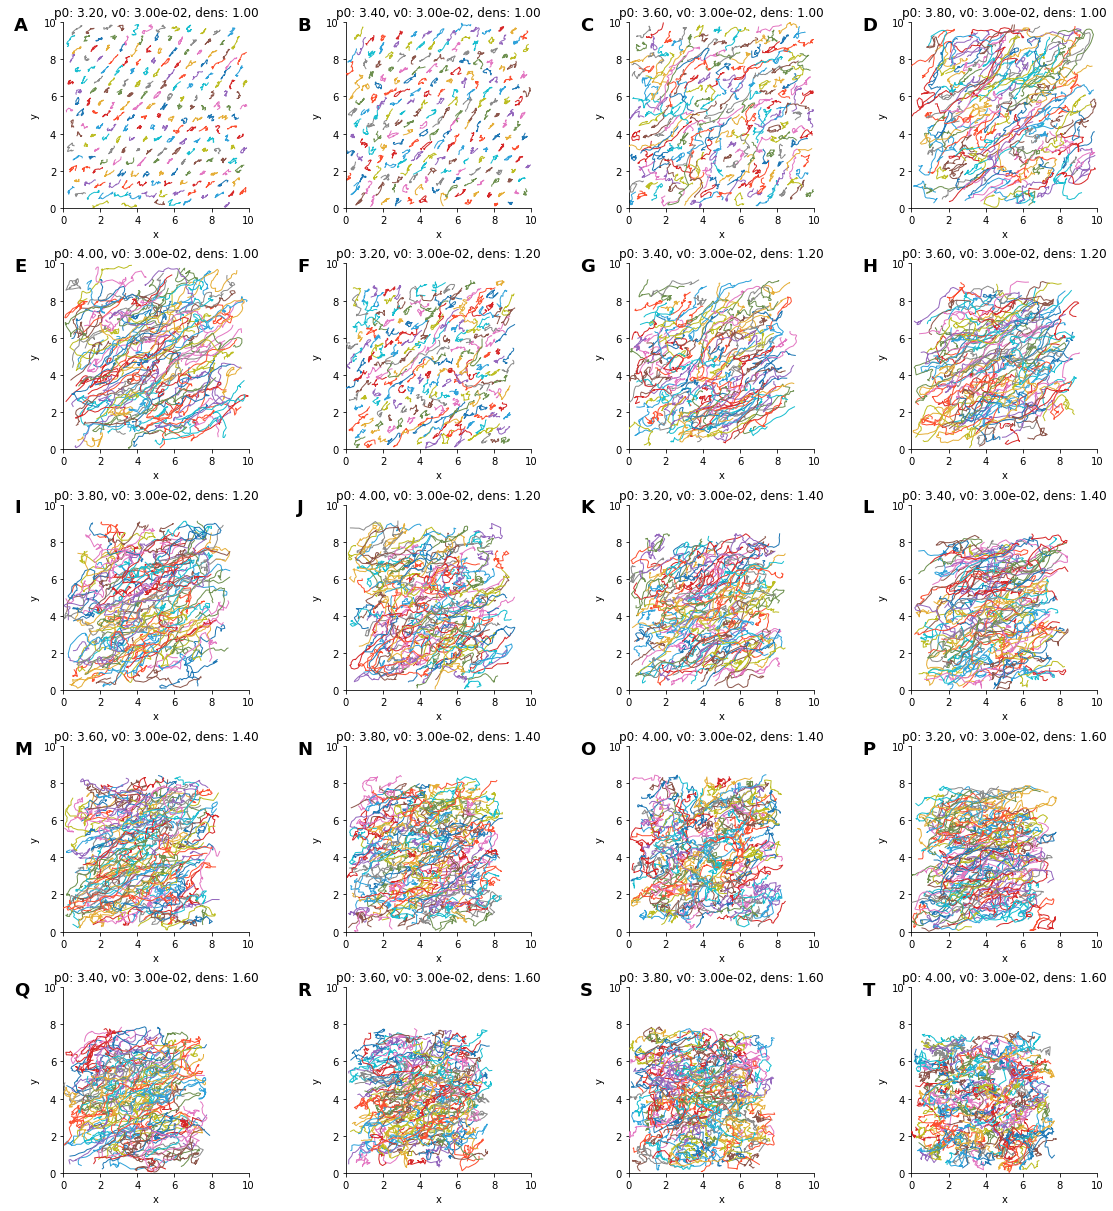

In [207]:
hv.Layout(plots[2::3]).cols(4)